<a href="https://colab.research.google.com/github/Juko626/Learning-computer-vision/blob/main/darknetCloneYOLOVideoSave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Darknet Clone

Runtime => GPU

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.


In [2]:
!ls -al darknet

total 264
drwxr-xr-x 14 root root  4096 Feb 15 09:28 .
drwxr-xr-x  1 root root  4096 Feb 15 09:28 ..
drwxr-xr-x  4 root root  4096 Feb 15 09:28 3rdparty
drwxr-xr-x  3 root root  4096 Feb 15 09:28 build
-rwxr-xr-x  1 root root 31389 Feb 15 09:28 build.ps1
drwxr-xr-x  3 root root  4096 Feb 15 09:28 cfg
drwxr-xr-x  2 root root  4096 Feb 15 09:28 .circleci
drwxr-xr-x  3 root root  4096 Feb 15 09:28 cmake
-rw-r--r--  1 root root 24768 Feb 15 09:28 CMakeLists.txt
-rw-r--r--  1 root root  1406 Feb 15 09:28 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9469 Feb 15 09:28 darknet_images.py
-rw-r--r--  1 root root 10828 Feb 15 09:28 darknet.py
-rw-r--r--  1 root root  6747 Feb 15 09:28 darknet_video.py
drwxr-xr-x  3 root root  4096 Feb 15 09:28 data
drwxr-xr-x  8 root root  4096 Feb 15 09:28 .git
drwxr-xr-x  4 root root  4096 Feb 15 09:28 .github
-rw-r--r--  1 root root   686 Feb 15 09:28 .gitignore
-rwxr-xr-x  1 root root   110 Feb 15 09:28 image_yolov3.sh
-rwxr-xr-x  1 root root   110 Feb 15 

In [3]:
%cd darknet

/content/darknet


In [4]:
# change makefile to have GPU,OPENCV, CUDNN enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile   #CUDNN사용하게 설정??

In [5]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [6]:
#Compile Sources
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [7]:
from google.colab import files
files.download('darknet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-02-15 09:30:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.4MB/s    in 12s     

2022-02-15 09:30:35 (19.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [9]:
!ls -al data

total 1744
drwxr-xr-x  3 root root   4096 Feb 15 09:28 .
drwxr-xr-x 16 root root   4096 Feb 15 09:30 ..
-rw-r--r--  1 root root 140047 Feb 15 09:28 9k.tree
-rw-r--r--  1 root root    387 Feb 15 09:28 coco9k.map
-rw-r--r--  1 root root    625 Feb 15 09:28 coco.names
-rw-r--r--  1 root root 163759 Feb 15 09:28 dog.jpg
-rw-r--r--  1 root root 141886 Feb 15 09:28 eagle.jpg
-rw-r--r--  1 root root 382965 Feb 15 09:28 giraffe.jpg
-rw-r--r--  1 root root     80 Feb 15 09:28 goal.txt
-rw-r--r--  1 root root 133495 Feb 15 09:28 horses.jpg
-rw-r--r--  1 root root 218420 Feb 15 09:28 imagenet.labels.list
-rw-r--r--  1 root root 246356 Feb 15 09:28 imagenet.shortnames.list
drwxr-xr-x  2 root root  20480 Feb 15 09:28 labels
-rw-r--r--  1 root root   5476 Feb 15 09:28 openimages.names
-rw-r--r--  1 root root 113880 Feb 15 09:28 person.jpg
-rw-r--r--  1 root root 174515 Feb 15 09:28 scream.jpg
-rw-r--r--  1 root root    135 Feb 15 09:28 voc.names


In [10]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

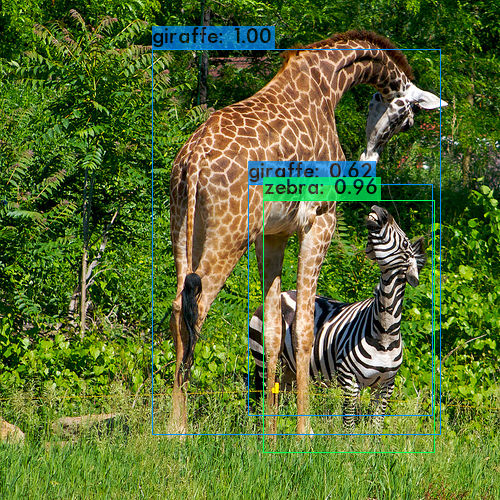

In [11]:
import cv2

from google.colab.patches import cv2_imshow

result = cv2.imread('predictions.jpg')
cv2_imshow(result)

#2. OpenCV YOLO Video


In [12]:
import IPython
import numpy as np
import time

min_confidence = 0.5

In [13]:
weight_file = 'yolov3.weights'
cfg_file = 'cfg/yolov3.cfg'
name_file = 'data/coco.names'

file_name = 'cabc30fc-e7726578.mp4'

In [14]:
!ls -al data/coco.names

-rw-r--r-- 1 root root 625 Feb 15 09:28 data/coco.names


In [15]:
# Load Yolo
import cv2
net = cv2.dnn.readNet(weight_file, cfg_file)

In [16]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [17]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [18]:
# cabc30fc-e7726578.mp4

from google.colab import files
files.upload()

Saving cabc30fc-e7726578.mp4 to cabc30fc-e7726578.mp4


In [19]:
frame_count = 0
# initialize the video writer 
writer = None
output_name = 'output_video.avi'

In [20]:
def writeFrame(img):
    # use global variable, writer
    global writer
    height, width = img.shape[:2]
    if writer is None and output_name is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
    if writer is not None:
        writer.write(img)

In [22]:
def detectAndDisplay(frame):
    # use global variable, writer
    global frame_count
    #frame_num += 1
    start_time = time.time()
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > min_confidence:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            #print(class_ids[i], label, confidence[i])
            color = colors[i]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)  

    frame_time = time.time() - start_time 
    print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)   
    writeFrame(frame)

Frame 0 time 2.0134353637695312


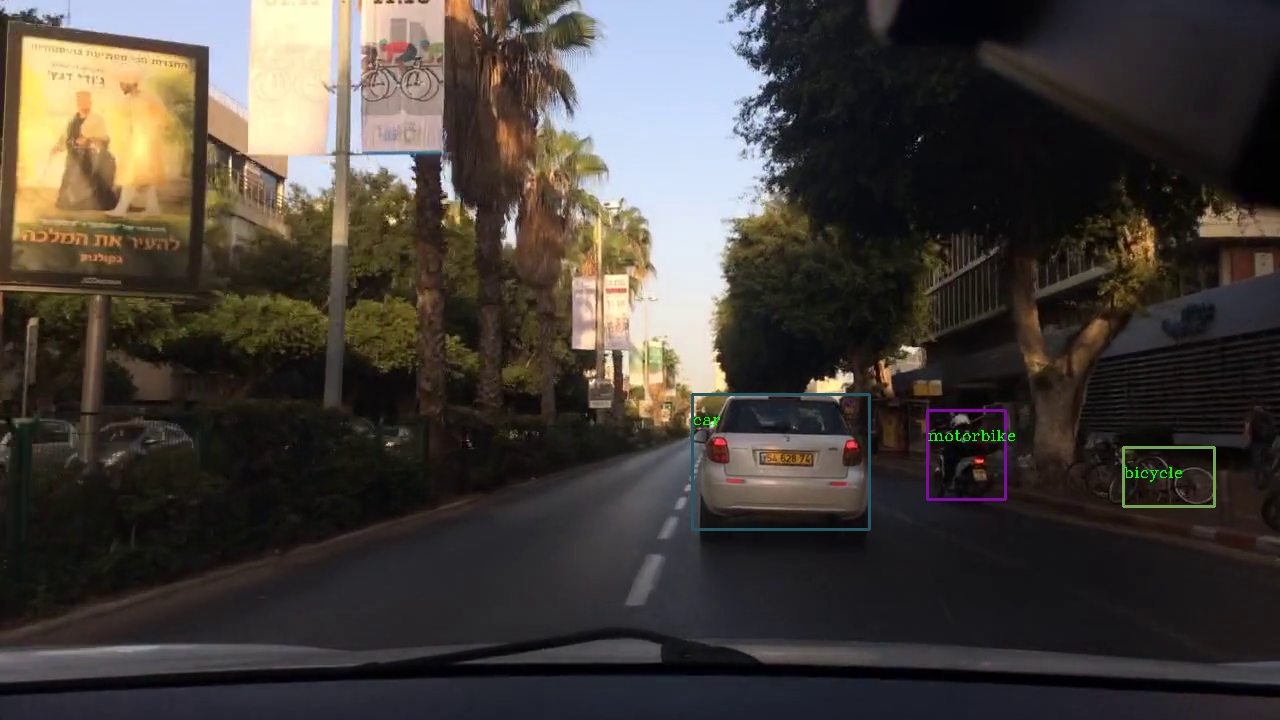

--(!) No captured frame -- Break!


In [23]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break      
    detectAndDisplay(frame)